**Bit-Flip Error Correction Code in Qiskit: Implementation, Analysis and Experiments**

**Author:** Sajiya Pari

**Course**: Introduction to quantum Information

**Abstract**

We implement the 3-qubit bit-flip quantum error-correcting code in Qiskit.
The goal is to encode a single-qubit state into a logical 3-qubit repetition code, introduce a controlled bit-flip error, measure the error syndrome via stabilizers, and apply the appropriate correction.

We derive the full mathematical structure of the 3-qubit repetition code, show the stabilizer eigenvalue table, and compute the fidelity between the recovered and original states.

The experiment is implemented in Qiskit using the **AerSimulator** (statevector mode).
Bloch-sphere comparisons of initial and decoded states show that the code successfully restores arbitrary single-qubit states when a single bit-flip error occurs.



1. **Problem Statement**

*  We consider a single-qubit state
     

      1.∣ψ⟩=cosθ/2​∣0⟩+eiϕsinθ/2​∣1⟩.   
      







**Aim:**



* Encode the state into the 3-qubit bit-flip .


  1. ∣ψL​⟩=α∣000⟩+β∣111⟩


*   Introduce a bit-flip (X) error on one of the qubits.
*   Use stabilizer measurements to detect where the error occurred.
*   Correct the corrupted qubit.
*   Verify performance:

        1.final statevector

        2.fidelity with the original state

        3.Bloch-sphere comparison.

	​
      










2. **Mathematical Theory of the Bit-Flip **
  
   **motivation**
   
   The bit-flip channel flips a qubit with probability
            
            ∣0⟩↦∣1⟩,∣1⟩↦∣0⟩.

   To correct such an error, the information must be stored redundantly, allowing majority voting or stabilizer detection to infer which qubit flipped.

   **Encoding**

   The 3-qubit repetition code encodes logical states as:

            ∣0L​⟩=∣000⟩,∣1L​⟩=∣111⟩.

   For an arbitrary single-qubit state

            ∣ψ⟩=α∣0⟩+β∣1⟩,

   the encoded state becomes

            ∣ψL​⟩=α∣000⟩+β∣111⟩.

   This spreads the information across three qubits, allowing recovery from one bit flip.

   **Single-Bit-Flip Error**

   Suppose qubit 1 flips:

           ∣ψL′​⟩=α∣010⟩+β∣101⟩.

   We must detect which qubit flipped without learning∣𝜓⟩

   **Stabilizer Measurements**

   The 3-qubit code uses stabilizers:
          
          S1​=Z0​Z1​,S2​=Z1​Z2​.

    They produce an error syndrome:

    | Error            | (S_1) | (S_2) | Syndrome | Correction |
    | ---------------- | ----- | ----- | -------- | ---------- |
    | No error         | +1    | +1    | 00       | I          |
    | Error on qubit 0 | –1    | +1    | 11       | X₀         |
    | Error on qubit 1 | –1    | –1    | 01       | X₁         |
    | Error on qubit 2 | +1    | –1    | 10       | X₂         |

    Each syndrome uniquely identifies the corrupted qubit.     

    **Decoding**

    Based on the syndrome bits, we apply:
            
          X0​ if syndrome 11,X1​ if syndrome 01,X2​ if syndrome 10.

    This restores the original logical state.
                                          

**Import some important libraries**


In [1]:
!pip install qiskit==2.0.0
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install matplotlib
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b5e385bcf127cbc52d87bd29ba4fffde3c35d85026979d0b4635f1573c49322c
  Stored in d

**Qiskit Implimentation**

Initial |ψ> = [np.float64(0.9210609940028851), np.float64(0.3894183423086505)]

Final statevector =
 Statevector([0.        +0.j        , 0.        +0.j        ,
             0.68281896-0.13841426j, 0.70305673+0.14251665j,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.      

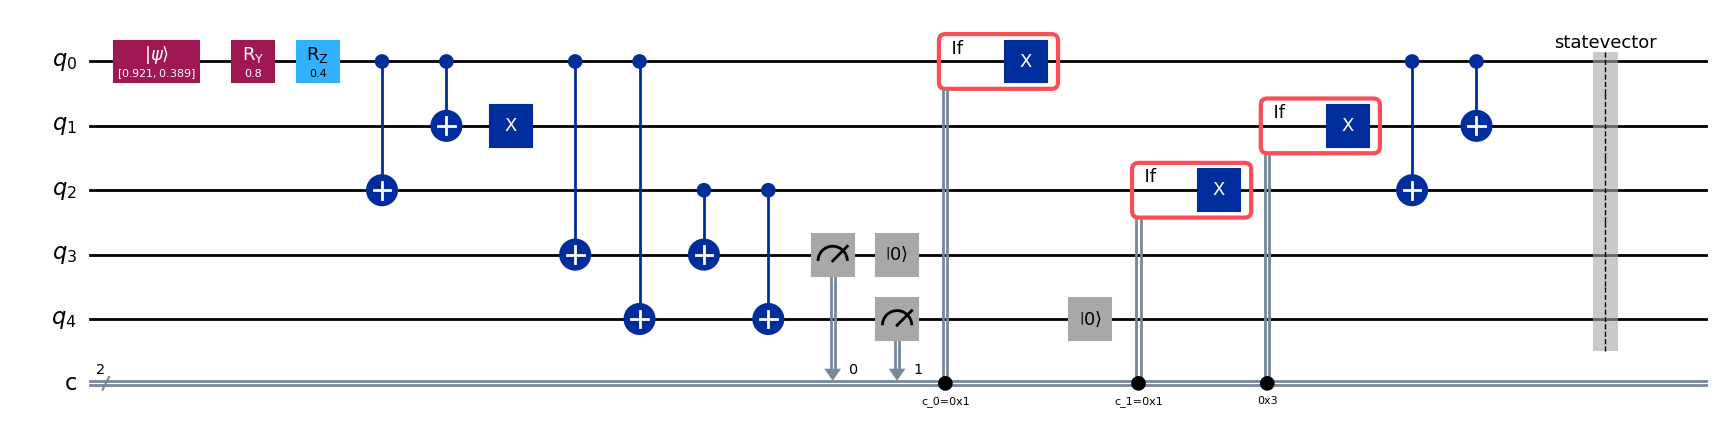

In [2]:
# Bit flip error correction for three qubits
from qiskit import QuantumRegister , ClassicalRegister , QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import partial_trace, DensityMatrix, Pauli
import numpy as np
from qiskit.quantum_info import state_fidelity
from qiskit.visualization import plot_bloch_vector

q = QuantumRegister(5, "q")
c = ClassicalRegister(2, "c")
qc = QuantumCircuit(q,c)

theta = 0.8 # Define theta before it's used
phi = 0.4   # Define phi before it's used

psi_initial = [np.cos(theta/2), np.sin(theta/2)]
qc.initialize(psi_initial, 0)
print("Initial |ψ> =", psi_initial)
#for entangled state
qc.ry(theta, 0)
qc.rz(phi,0)
qc.cx(0,2)
qc.cx(0,1)
# second bit is flip initially
qc.x(1)
# stablizer
qc.cx(0,3)
qc.cx(0,4)
qc.cx(2,3)
qc.cx(2,4)
# syndrome detection
qc.measure(3,0) # measures q[3] into c[0]
qc.measure(4,1) # measures q[4] into c[1]
qc.draw("mpl")
qc.reset([q[3], q[4]]) # Pass multiple qubits as a list to qc.reset()
qc.draw("mpl")

# Corrected if_test conditions to reference classical bits and the register 'c'
with qc.if_test((c[0], 1)): # Check if classical bit c[0] is 1 for 10
    qc.x(0)
with qc.if_test((c[1], 1)): # Check if classical bit c[1] is 1 for 01
    qc.x(2)
with qc.if_test((c, 3)): # Check if the entire classical register c has value 3 (binary '11')
    qc.x(1)
qc.cx(0,2)
qc.cx(0,1)

qc.save_statevector() # Added to save the statevector after all operations
svsim = AerSimulator(method="statevector")
result = svsim.run(qc).result()
psi_final = result.get_statevector(qc)
print("\nFinal statevector =\n", psi_final)
rho = partial_trace(psi_final, [1,2,3,4])   # trace ancillas & other data qubits
# Exact density matrix of initial pure state
rho_initial = DensityMatrix(np.outer(psi_initial, np.conjugate(psi_initial)))

F = state_fidelity(rho, rho_initial)
print("\nFidelity =", F)


# Calculate Bloch vector components for initial state
x_initial = rho_initial.expectation_value(Pauli('X'))
y_initial = rho_initial.expectation_value(Pauli('Y'))
z_initial = rho_initial.expectation_value(Pauli('Z'))
bloch_initial = [x_initial, y_initial, z_initial]

# Calculate Bloch vector components for final recovered qubit
x_final = rho.expectation_value(Pauli('X'))
y_final = rho.expectation_value(Pauli('Y'))
z_final = rho.expectation_value(Pauli('Z'))
bloch_final = [x_final, y_final, z_final]

print("Initial Bloch =", bloch_initial)
print("Final Bloch   =", bloch_final)

plot_bloch_vector(bloch_initial, title="Before Error")
plot_bloch_vector(bloch_final, title="After Correction")
qasm = AerSimulator()
res = qasm.run(qc).result()
print("\nShot counts =", res.get_counts())
qc.draw("mpl")

6. **Conclusion**

    We implemented and analyzed the 3-qubit bit-flip error correction code in Qiskit.
    Using stabilizer measurements and classical feedback, the code successfully identifies and corrects single bit-flip errors.

    High fidelity and matching Bloch-sphere vectors verify that the quantum information is preserved.

    This project demonstrates the operational principles of quantum error correction, one of the central requirements for fault-tolerant quantum computation.